In [9]:
# All imports needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics

### Dataset Visualizations

Dataset used: [Wine Quality dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

##### Features:
* Fixed Acidity
* Volatile Acidity
* Citric Acid
* Residual Sugar
* Chlorides
* Free Sulfur Dioxide
* Total Sulfur Dioxide
* Density
* pH
* Sulphates
* Alcohol
* Wine Quality, score between 0 and 10 (Ground Truth)

In [10]:
# Read data from file
white_wine = pd.read_csv("../data/wine/winequality-white.csv", sep=';') 
red_wine = pd.read_csv("../data/wine/winequality-red.csv", sep=';') 
wine = pd.concat([red_wine,white_wine])

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Dataset Exploration:

(0, 12)

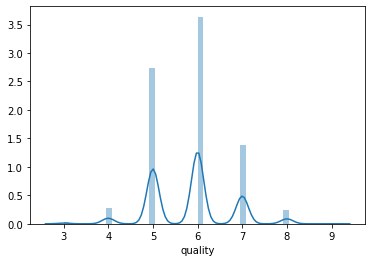

In [11]:
# distribution of target attribute "quality"
sns.distplot(wine.quality) # kde=0 if kernel density estimation is not necessary

# Scatterplot-Matrix visualises correlation of every possible combination of attributes, 
# especially the correlation of the input attributes and the target attribute quality is of importance
# sns.pairplot(wine)

# heatmap visualises the correlation of each pair of values
# sns.heatmap(wine.corr())

null_wine = wine[wine.isnull().values.any(axis=1)]
null_wine.shape

#### Modeling:
Regressionstechniken: Linear, Polynomial, knn, Regression

In [30]:
def linear_regression(X_train, X_test, y_train):
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Testing
    y_pred = model.predict(X_test)
    
    # predictions on testing set
    return y_pred

def polynomial_regression(X_train, X_test, y_train, degree = 2):
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(x_poly, y_train)
    
    y_pred = model.predict(poly.fit_transform(X_test))
    return y_pred
    
def knn_regression(X_train, X_test, y_train, n = 5):
    model = neighbors.KNeighborsRegressor(n)
    model.fit(X_train, y_train)

    # Testing
    y_pred = model.predict(X_test)
    
    # predictions on testing set
    return y_pred
    
def regression_tree(X_train, X_test, y_train):
    model = DecisionTreeRegressor(random_state=0)
    model.fit(X_train, y_train)

    # Testing
    y_pred = model.predict(X_test)
    
    # predictions on testing set
    return y_pred

def plot_scatter(y_test, y_pred):
    # Plot outputs
    plt.scatter(y_test, y_pred)

    plt.xticks(())
    plt.yticks(())

    plt.show()
    
def print_performance(y_test, y_pred):
    # Mean Squared Error
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    
    print("RMSE: ", metrics.mean_squared_error(y_test,y_pred, squared=False))
    
    # R2 is between 0 and 100 percent
    # 0 indicates that the model explains none of the variability of the response data around its mean.
    # 100 indicates that the model explains all the variability of the response data around its mean.
    print("R2: ", metrics.r2_score(y_test,y_pred) * 100)
    

In [31]:
X_train, X_test, y_train, y_test = train_test_split(wine.drop('quality', axis=1),wine['quality'], test_size=0.2)

# Linear regression
print('Linear Regression')
y_pred = linear_regression(X_train, X_test, y_train)
print_performance(y_test,y_pred)

# Polynomial regression
print('\nPolynomial Regression')
y_pred = polynomial_regression(X_train, X_test, y_train)
print_performance(y_test,y_pred)

# knn regression
print('\nKNN Regression')
y_pred = knn_regression(X_train, X_test, y_train)
print_performance(y_test,y_pred)

# regression tree
print('\nRegression Tree')
y_pred = regression_tree(X_train, X_test, y_train)
print_performance(y_test,y_pred)

Linear Regression
MSE:  0.5527997456409065
RMSE:  0.7435050407636161
R2:  25.300377952511756

Polynomial Regression
MSE:  0.5159304334537013
RMSE:  0.7182829758902136
R2:  30.28251426363108

KNN Regression
MSE:  0.6577230769230769
RMSE:  0.8110012804694434
R2:  11.122127595948017

Regression Tree
MSE:  0.7238461538461538
RMSE:  0.8507914867029135
R2:  2.186941041105772
